In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

In [2]:
data = pd.read_csv('fuku.csv')
data.head()

,Time,Amplitude
0,2016-11-21T20:59:32.019538Z,1140
1,2016-11-21T20:59:32.069538Z,921
2,2016-11-21T20:59:32.119538Z,676
3,2016-11-21T20:59:32.169538Z,319
4,2016-11-21T20:59:32.219538Z,-36


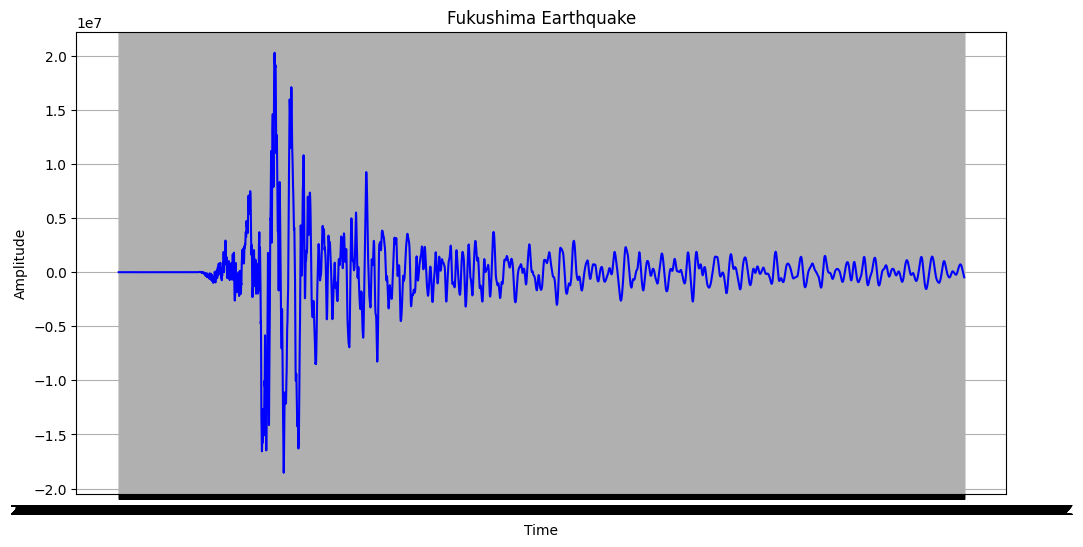

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Amplitude'], color='blue')
plt.title('Fukushima Earthquake')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

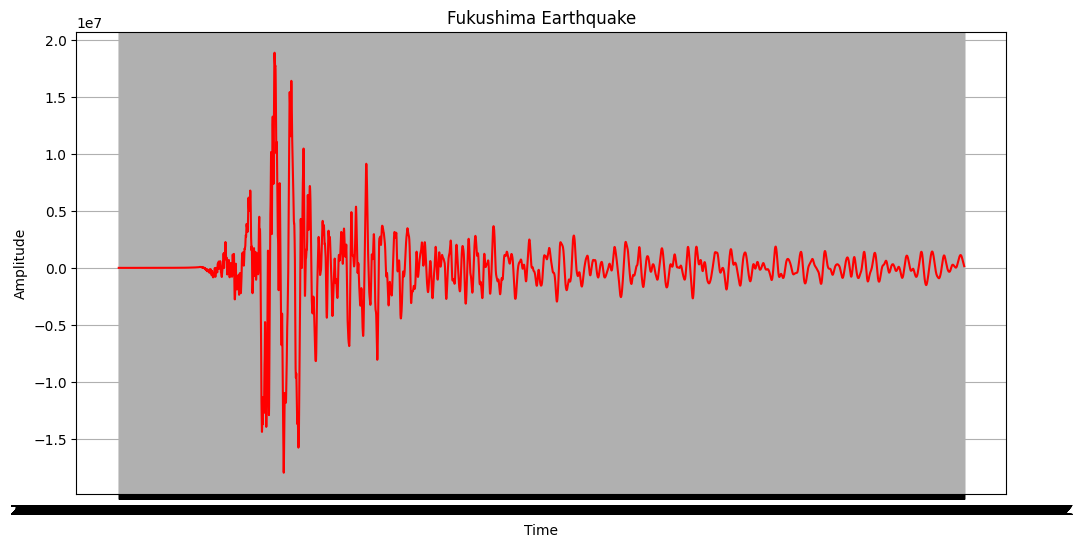

In [4]:
def butter_bandpass(lowcut, highcut, fs, order=1):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=1):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

fs = 100
lowcut = 0.1
highcut = 10.0

filtered_amplitude = bandpass_filter(data['Amplitude'], lowcut, highcut, fs)

plt.figure(figsize=(12, 6))
plt.plot(data['Time'], filtered_amplitude, color='red')
plt.title('Fukushima Earthquake')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

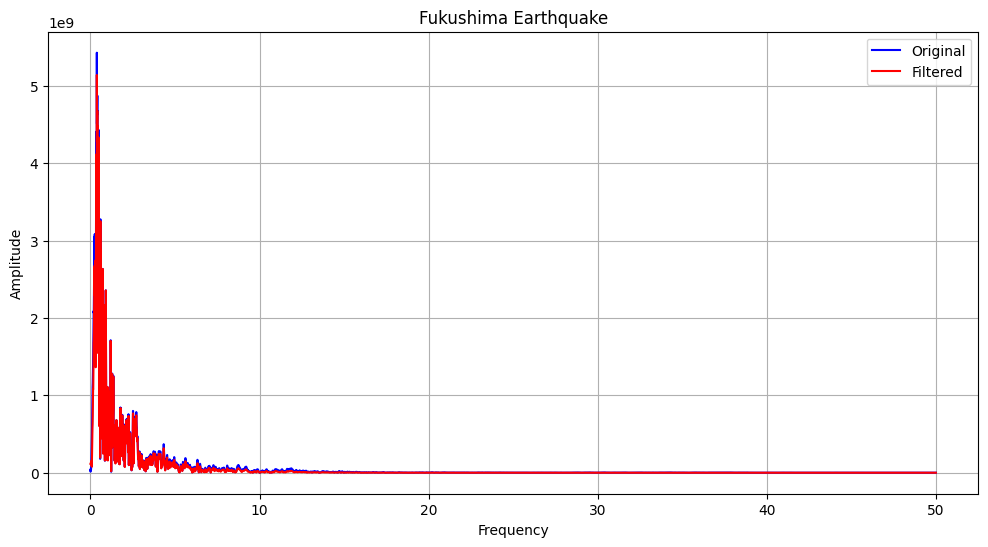

In [5]:
from scipy.fft import fft, fftfreq

original_fft = fft(data['Amplitude'])
filtered_fft = fft(filtered_amplitude)

n = len(data['Amplitude'])
freq = fftfreq(n, d=1/fs)

plt.figure(figsize=(12, 6))
plt.plot(freq[:n//2], np.abs(original_fft)[:n//2], color='blue', label='Original')
plt.plot(freq[:n//2], np.abs(filtered_fft)[:n//2], color='red', label='Filtered')
plt.title('Fukushima Earthquake')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

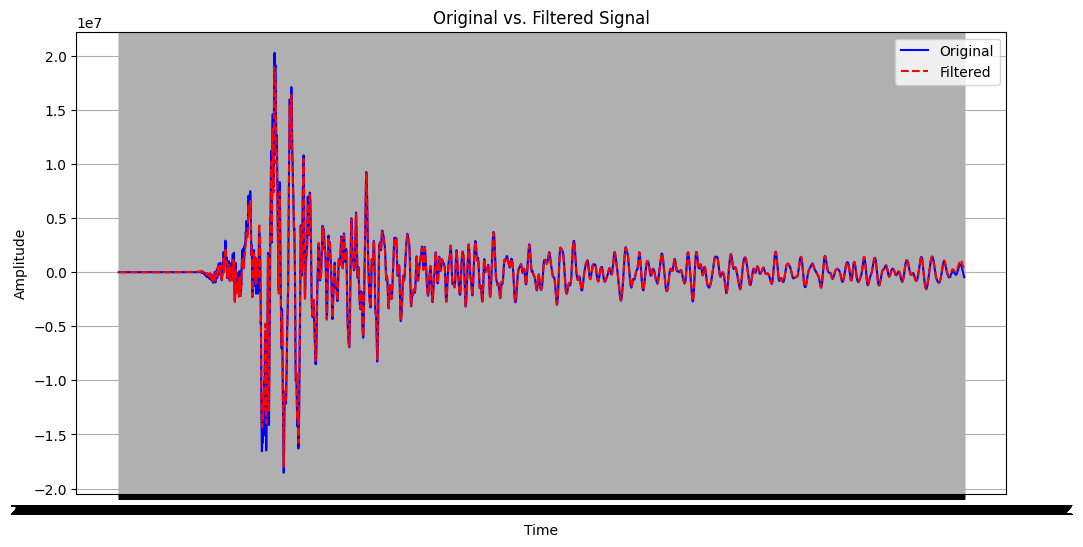

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Amplitude'], color='blue', label='Original')
plt.plot(data['Time'], filtered_amplitude, color='red', linestyle='--', label='Filtered')
plt.title('Original vs. Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


In [7]:
def calculate_snr(signal, noise):
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

original_snr = calculate_snr(data['Amplitude'], data['Amplitude'] - data['Amplitude'].mean())
filtered_snr = calculate_snr(data['Amplitude'], filtered_amplitude - filtered_amplitude.mean())

print(f"SNR before filtering: {original_snr:.2f} dB")
print(f"SNR after filtering: {filtered_snr:.2f} dB")

SNR before filtering: 0.00 dB
SNR after filtering: 0.49 dB


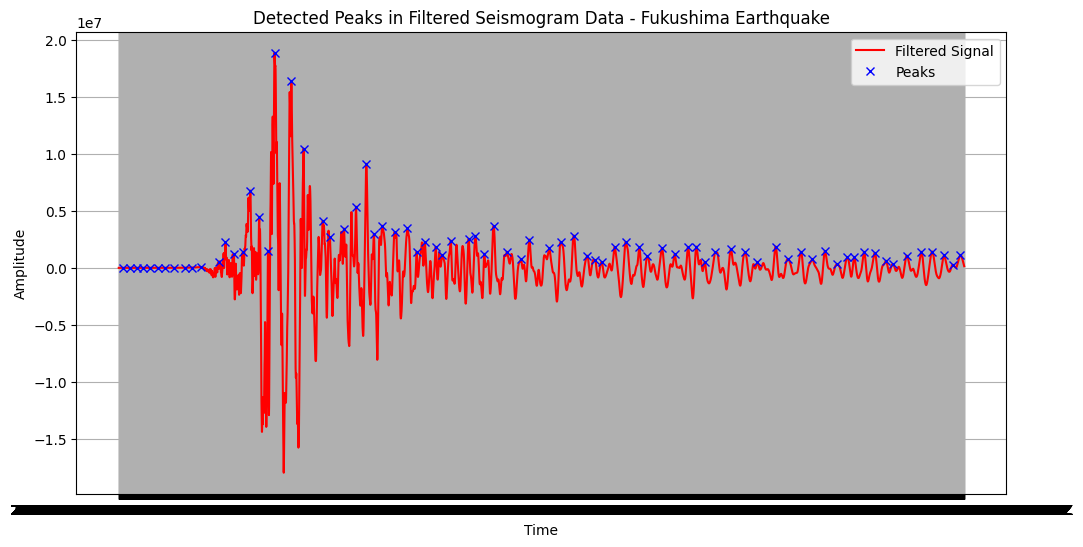

In [8]:
peaks, _ = find_peaks(filtered_amplitude, height=0.5, distance=100)

plt.figure(figsize=(12, 6))
plt.plot(data['Time'], filtered_amplitude, color='red', label="Filtered Signal")
plt.plot(data['Time'][peaks], filtered_amplitude[peaks], 'x', color='blue', label='Peaks')
plt.title('Detected Peaks in Filtered Seismogram Data - Fukushima Earthquake')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [9]:
peak_data = pd.DataFrame({
    'Time': data['Time'][peaks],
    'Amplitude': filtered_amplitude[peaks]
})

peak_data.head()

,Time,Amplitude
70,2016-11-21T20:59:35.519538Z,901.675367
172,2016-11-21T20:59:40.619538Z,1529.292743
278,2016-11-21T20:59:45.919538Z,887.778261
380,2016-11-21T20:59:51.019538Z,1015.887008
485,2016-11-21T20:59:56.269538Z,899.612701
